# IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set(style = 'darkgrid')
%matplotlib inline
from datetime import datetime
from scipy.stats import zscore
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator

# IMPORT DATASET

In [ ]:
education_df = pd.read_csv('education.csv')
employment_df = pd.read_csv('employment.csv')
job_df = pd.read_csv('jobs.csv')


# EXPLORATORY DATA ANALYSIS  (EDA)

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
employment_df.columns

Index(['employmentId', 'uploadResume', 'currentCompany', 'currentDesignation',
       'annualSalary', 'industry', 'functionalArea', 'role', 'currentLocation',
       'orgId', 'noticePeriod', 'skills', 'totalWorkExp', 'minExp', 'maxExp',
       'applicantId', 'preferedLocation', 'holdingAnyOffer', 'expectedCtc',
       'feedback', 'comment', 'isCurrent', 'companyEmail', 'packageOffered',
       'lastWorkingDay', 'remarks', 'previousCompany', 'offerLetter',
       'experienceLetter', 'relieveingLetter', 'isRecent', 'paySlips',
       'createdOn'],
      dtype='object')

In [ ]:
education_df.columns

Index(['Id', 'primarySchool', 'primaryPercentage', 'primaryPassoutYear',
       'secondarySchool', 'secondaryPercentage', 'secondaryPassoutYear',
       'graduation', 'graduationPercentage', 'graduationPassoutYear', 'orgId',
       'applicantId', 'certificates', 'name', 'degree', 'fieldOfStudy',
       'percentage', 'certificate', 'createdOn'],
      dtype='object')

In [ ]:
employment_df.dtypes

employmentId            int64
uploadResume           object
currentCompany         object
currentDesignation     object
annualSalary           object
industry              float64
functionalArea         object
role                  float64
currentLocation        object
orgId                 float64
noticePeriod           object
skills                 object
totalWorkExp          float64
minExp                float64
maxExp                float64
applicantId            object
preferedLocation       object
holdingAnyOffer        object
expectedCtc            object
feedback               object
comment                object
isCurrent              object
companyEmail           object
packageOffered        float64
lastWorkingDay         object
remarks                object
previousCompany       float64
offerLetter           float64
experienceLetter      float64
relieveingLetter      float64
isRecent              float64
paySlips              float64
createdOn              object
dtype: obj

In [ ]:
education_df.dtypes

Id                         int64
primarySchool             object
primaryPercentage          int64
primaryPassoutYear         int64
secondarySchool           object
secondaryPercentage      float64
secondaryPassoutYear       int64
graduation                object
graduationPercentage     float64
graduationPassoutYear      int64
orgId                    float64
applicantId               object
certificates              object
name                     float64
degree                   float64
fieldOfStudy             float64
percentage               float64
certificate              float64
createdOn                 object
dtype: object

In [ ]:
employment_df.nunique()

employmentId          2099
uploadResume          1596
currentCompany        1538
currentDesignation     731
annualSalary           544
industry                13
functionalArea          81
role                     0
currentLocation        223
orgId                    1
noticePeriod            11
skills                 836
totalWorkExp           203
minExp                   0
maxExp                   0
applicantId           2047
preferedLocation        58
holdingAnyOffer          4
expectedCtc            319
feedback                12
comment                152
isCurrent                2
companyEmail             8
packageOffered          15
lastWorkingDay          15
remarks                 59
previousCompany          0
offerLetter              0
experienceLetter         0
relieveingLetter         0
isRecent                 0
paySlips                 0
createdOn                1
dtype: int64

In [ ]:
#duplicates value
employment_df.duplicated().sum()


0

In [ ]:
education_df.duplicated().sum()

0

# Missing Value Imputation

In [ ]:
employment_df.isnull().sum()

employmentId             0
uploadResume           499
currentCompany          97
currentDesignation      43
annualSalary           105
industry                95
functionalArea         113
role                  2099
currentLocation        100
orgId                  146
noticePeriod           180
skills                   0
totalWorkExp            97
minExp                2099
maxExp                2099
applicantId              0
preferedLocation       563
holdingAnyOffer        585
expectedCtc            560
feedback              2078
comment               1940
isCurrent              906
companyEmail          1405
packageOffered        2084
lastWorkingDay        2078
remarks               2040
previousCompany       2099
offerLetter           2099
experienceLetter      2099
relieveingLetter      2099
isRecent              2099
paySlips              2099
createdOn                0
dtype: int64

In [ ]:
# Define threshold for columns (e.g., remove columns with more than 50% missing values)
col_threshold = len(employment_df) * 0.5

# Remove columns with more than col_threshold missing values
employment_df = employment_df.dropna(axis=1, thresh=col_threshold)

# Define threshold for rows (e.g., remove rows with more than 50% missing values)
row_threshold = len(employment_df.columns) * 0.5

# Remove rows with more than row_threshold missing values
employment_df = employment_df.dropna(axis=0, thresh=row_threshold)

# Remove columns that are entirely empty
employment_df = employment_df.dropna(axis=1, how='all')

In [ ]:
employment_df.isnull().sum()

employmentId            0
uploadResume          407
currentCompany          7
currentDesignation      1
annualSalary           13
industry               93
functionalArea         21
currentLocation         8
orgId                 145
noticePeriod           88
skills                  0
totalWorkExp           95
applicantId             0
preferedLocation      471
holdingAnyOffer       493
expectedCtc           468
isCurrent             856
createdOn               0
dtype: int64

In [ ]:
# Fill missing values for numerical columns with the mean
numerical_columns = employment_df.select_dtypes(include=['int64', 'float64']).columns
employment_df[numerical_columns] = employment_df[numerical_columns].fillna(employment_df[numerical_columns].mean())

# Fill missing values for object columns with the mode
object_columns = employment_df.select_dtypes(include=['object']).columns
employment_df[object_columns] = employment_df[object_columns].fillna(employment_df[object_columns].mode().iloc[0])


In [ ]:
employment_df.isnull().sum()

employmentId          0
uploadResume          0
currentCompany        0
currentDesignation    0
annualSalary          0
industry              0
functionalArea        0
currentLocation       0
orgId                 0
noticePeriod          0
skills                0
totalWorkExp          0
applicantId           0
preferedLocation      0
holdingAnyOffer       0
expectedCtc           0
isCurrent             0
createdOn             0
dtype: int64

In [ ]:
education_df.isnull().sum()

Id                         0
primarySchool            177
primaryPercentage          0
primaryPassoutYear         0
secondarySchool          180
secondaryPercentage        0
secondaryPassoutYear       0
graduation               179
graduationPercentage       0
graduationPassoutYear      0
orgId                    188
applicantId                0
certificates             173
name                     188
degree                   188
fieldOfStudy             188
percentage               188
certificate              188
createdOn                  0
dtype: int64

In [ ]:
# Define threshold for columns (e.g., remove columns with more than 50% missing values)
col_threshold = len(education_df) * 0.5

# Remove columns with more than col_threshold missing values
education_df = education_df.dropna(axis=1, thresh=col_threshold)

# Define threshold for rows (e.g., remove rows with more than 50% missing values)
row_threshold = len(education_df.columns) * 0.5

# Remove rows with more than row_threshold missing values
education_df = education_df.dropna(axis=0, thresh=row_threshold)

# Remove columns that are entirely empty
education_df = education_df.dropna(axis=1, how='all')

In [ ]:
education_df.isnull().sum()

Id                       0
primaryPercentage        0
primaryPassoutYear       0
secondaryPercentage      0
secondaryPassoutYear     0
graduationPercentage     0
graduationPassoutYear    0
applicantId              0
createdOn                0
dtype: int64

# Data Visualization

<Axes: >

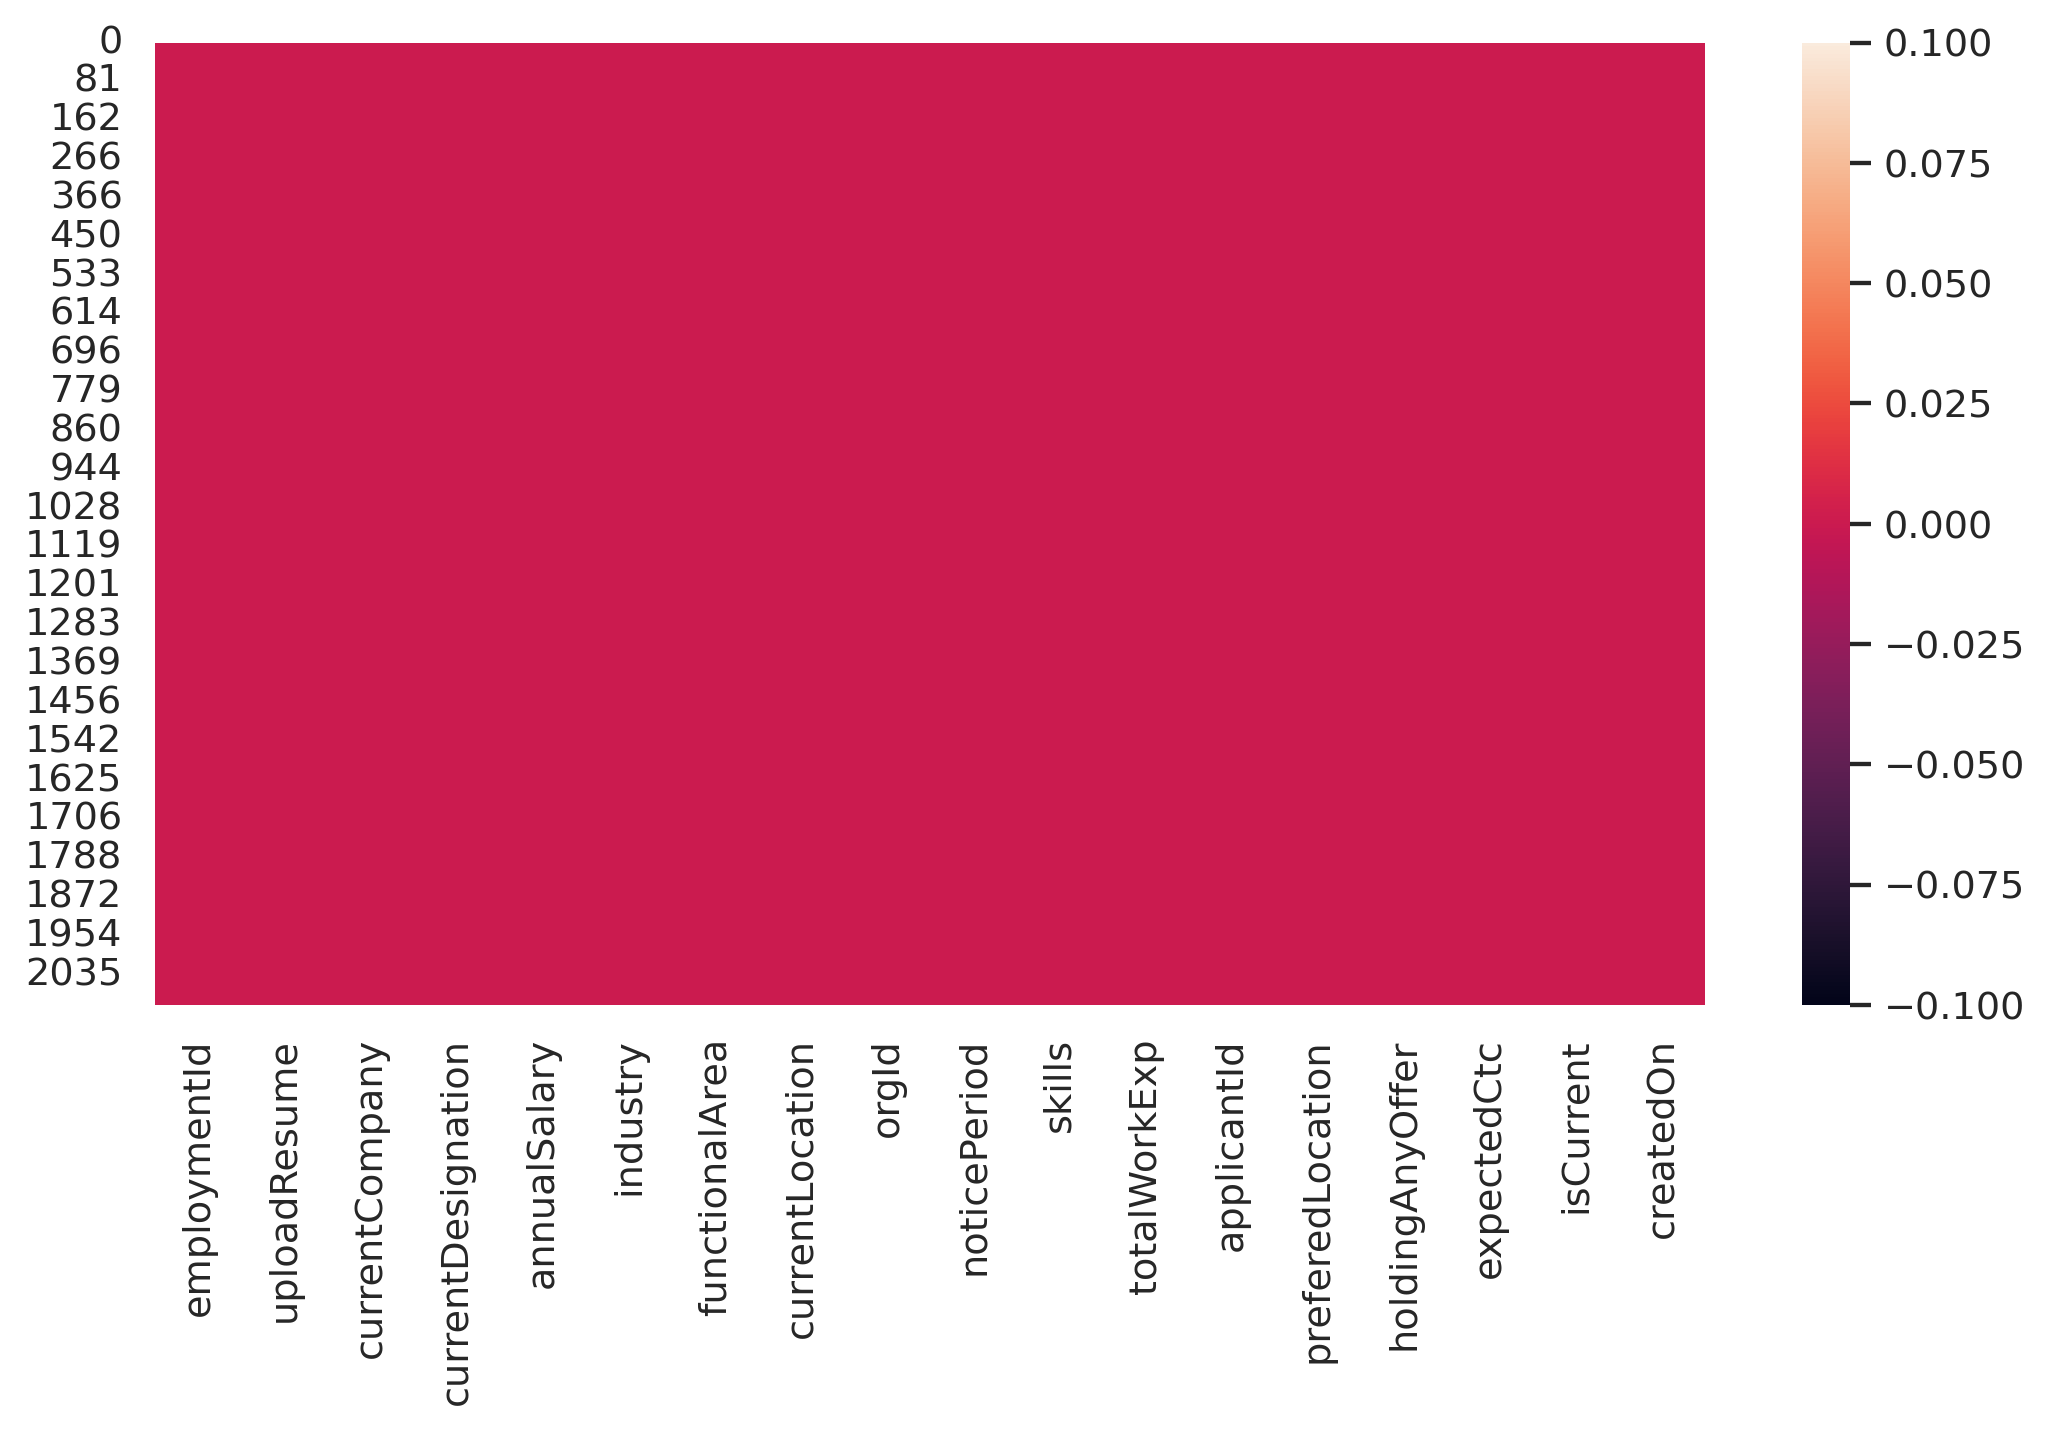

In [ ]:
sns.heatmap(employment_df.isnull())


<Axes: >

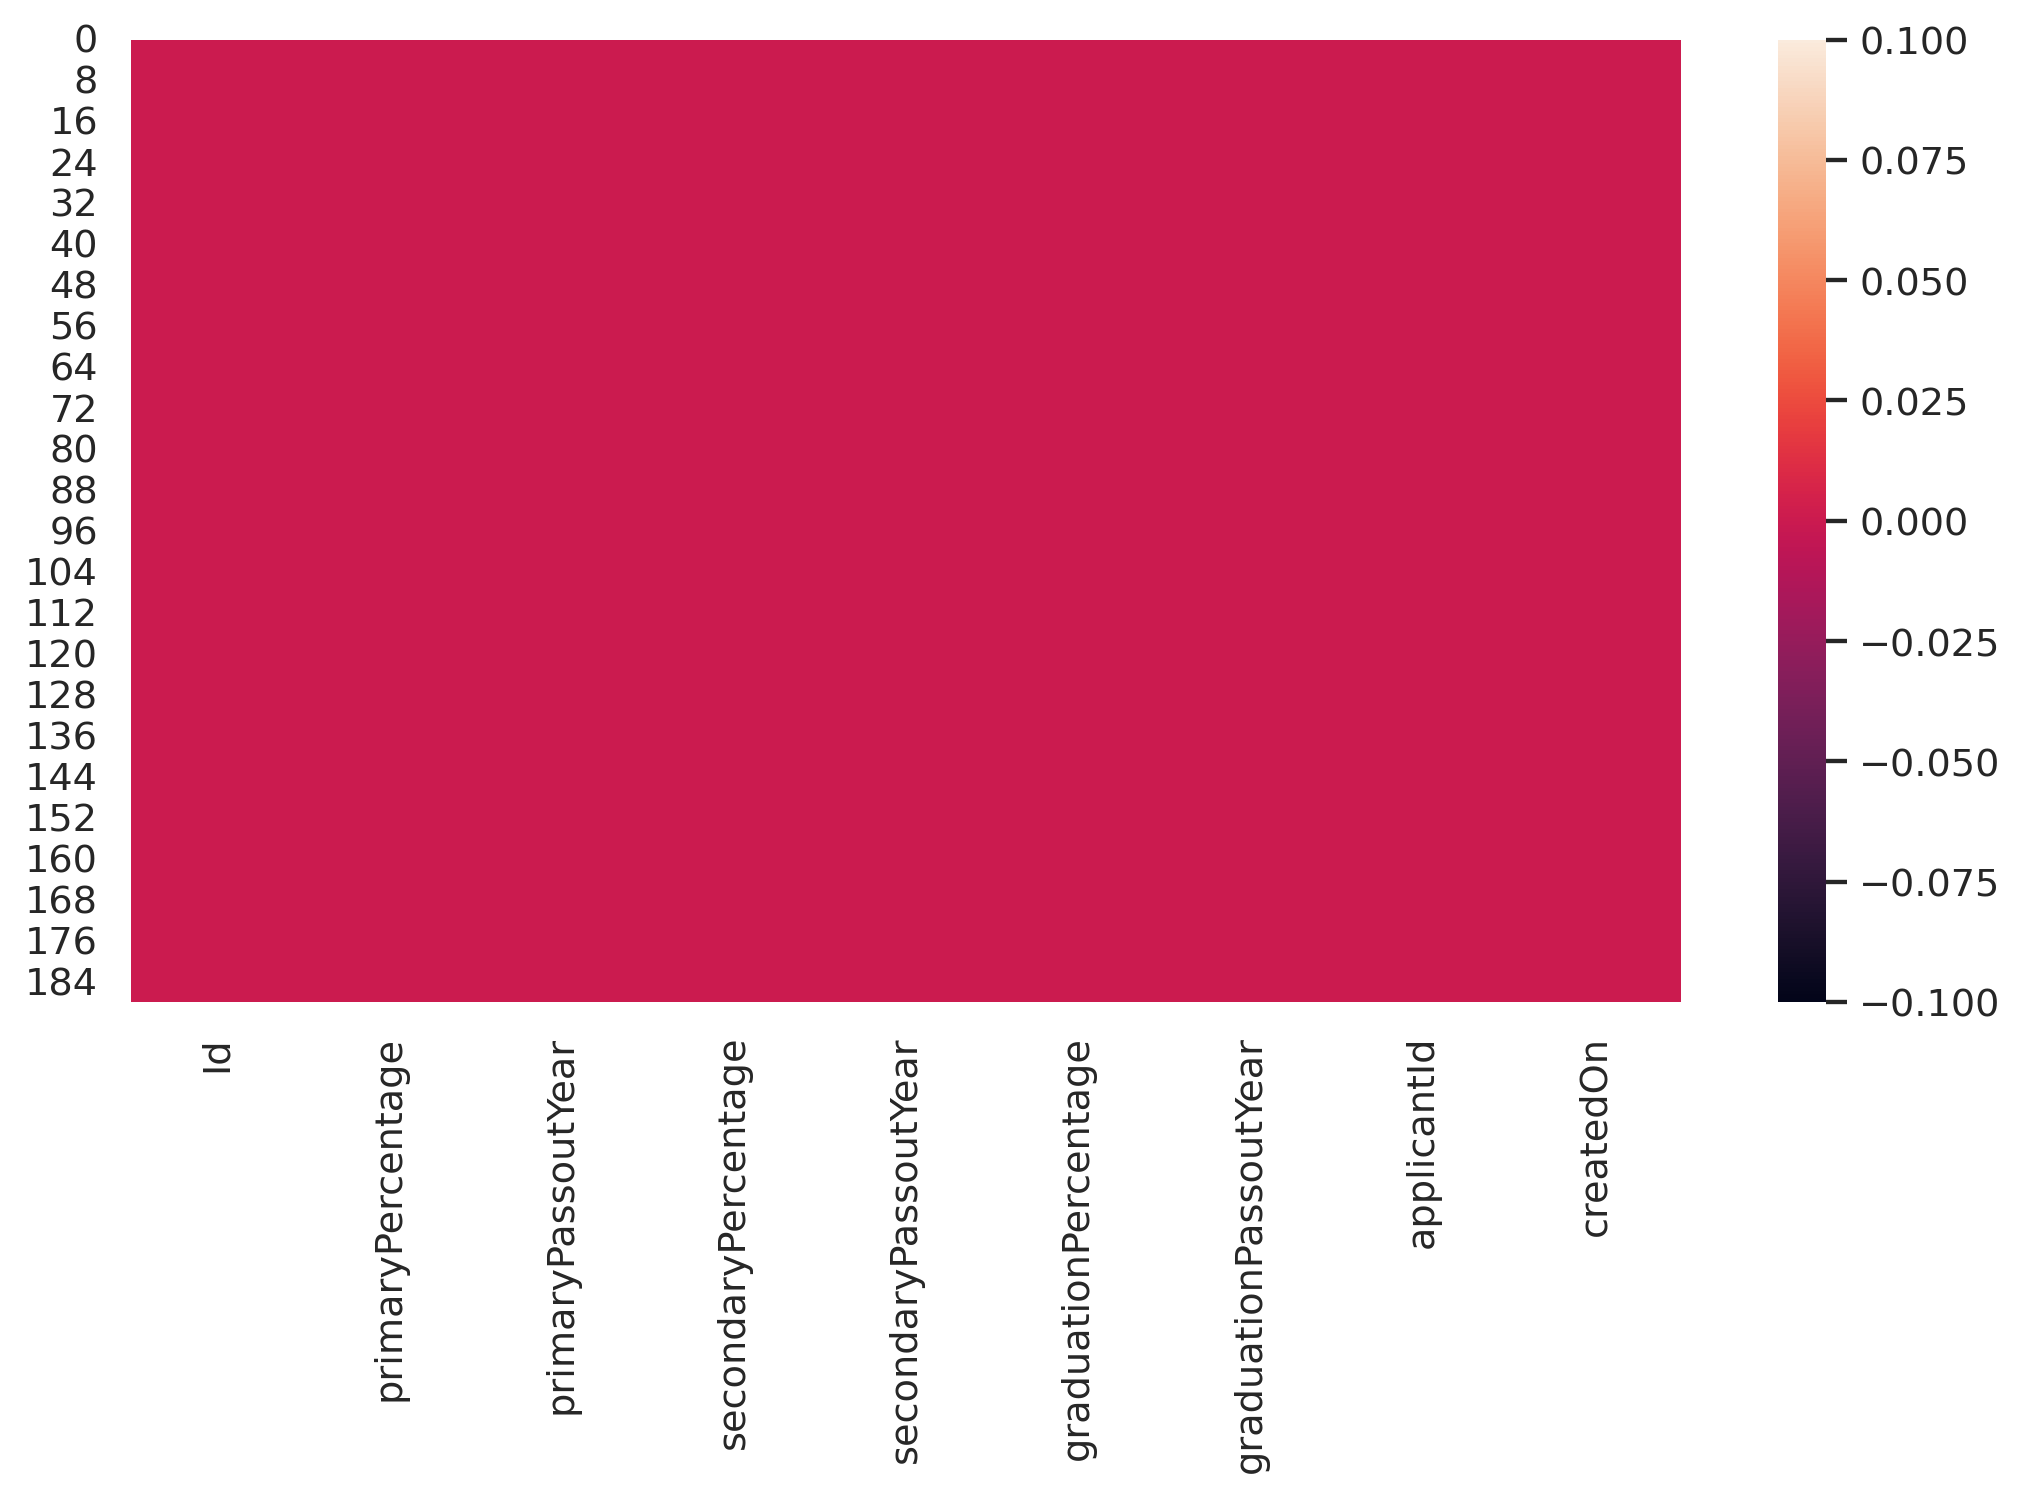

In [ ]:
sns.heatmap(education_df.isnull())

In [ ]:
userprofile_df = pd.merge(education_df, employment_df, on='applicantId')

# Droppping unnecessary Columns

In [ ]:
userprofile_df

,Id,primaryPercentage,primaryPassoutYear,secondaryPercentage,secondaryPassoutYear,graduationPercentage,graduationPassoutYear,applicantId,createdOn_x,employmentId,uploadResume,currentCompany,currentDesignation,annualSalary,industry,functionalArea,currentLocation,orgId,noticePeriod,skills,totalWorkExp,preferedLocation,holdingAnyOffer,expectedCtc,isCurrent,createdOn_y
0,1053,0,0,0.0,0,0.0,0,AIBV3257,2024-03-08 08:48:16.349684,2125,/applicants/Prakas_1_1686564319.pdf,Rams Creative Technologies Pvt Ltd,UxUi Product Designer,480000,1.0,Design,Hyderabad,1.0,15-30 days,"{""UIUX design"","" Web design"",""Application desi...",28.0,Hyderabad,No,700000,True,2024-03-08 08:49:43.960932
1,1054,0,0,0.0,0,0.0,0,AIAM6094,2024-03-08 08:48:16.349684,2126,/applicants/Prakas_1_1686564319.pdf,no,no,00000,1.0,Development,Hyderabad,1.0,Immediate,{ReactJS},0.0,Hyderabad,No,400000,True,2024-03-08 08:49:43.960932
2,1055,0,0,0.0,0,0.0,0,AIVB5204,2024-03-08 08:48:16.349684,2127,/applicants/Prakas_1_1686564319.pdf,Mrudul Technologies Pvt Ltd,UIUX Designer,600000,1.0,Design,Andhra Pradesh,1.0,Immediate,"{""UIUX design"","" Web design"",""Application desi...",39.0,Hyderabad,No,750000,True,2024-03-08 08:49:43.960932
3,1056,0,0,0.0,0,0.0,0,AICS4965,2024-03-08 08:48:16.349684,2128,/applicants/Prakas_1_1686564319.pdf,CM Cloud Control,ASSOCIATE UX DESIGNER,660000,1.0,Design,Andhra Pradesh,1.0,15-30 days,"{""UIUX design"",""Web design"",""Application desig...",32.0,Hyderabad,No,800000,True,2024-03-08 08:49:43.960932
4,1057,0,0,0.0,0,0.0,0,AILJ5766,2024-03-08 08:48:16.349684,2129,/applicants/Prakas_1_1686564319.pdf,Anvshn pvt ltd,UiUx Design,540000,1.0,Design,Hyderabad,1.0,Immediate,"{""UIUX design"",""Web design"",""Application desig...",42.0,Hyderabad,No,650000,True,2024-03-08 08:49:43.960932
5,1058,0,0,0.0,0,0.0,0,AISP4238,2024-03-08 08:48:16.349684,2130,/applicants/Prakas_1_1686564319.pdf,Kinre,UIUX Designer,430000,1.0,Design,Tirupathi,1.0,15-30 days,"{""UIUX design"",""Web design"",""Application desig...",33.0,Hyderabad,No,600000,True,2024-03-08 08:49:43.960932
6,1059,0,0,0.0,0,0.0,0,AIJT2556,2024-03-08 08:48:16.349684,2131,/applicants/Prakas_1_1686564319.pdf,Techthrive Solutions pvt ltd,UiUx Design,350000,1.0,Design,Bangalore,1.0,15-30 days,"{""UIUX design"",""Web design"",""Application desig...",26.0,Hyderabad,No,450000,True,2024-03-08 08:49:43.960932
7,1060,0,0,0.0,0,0.0,0,AIHP2712,2024-03-08 08:48:16.349684,2132,/applicants/Prakas_1_1686564319.pdf,NTT DATA Business Solutions Private Limited,Senior JIRA Administration,1535000,1.0,Admin,Hyderabad,1.0,Immediate,"{""Jira Administrator""}",132.0,Bangalore,No,2000000,True,2024-03-08 08:49:43.960932
8,1061,0,0,0.0,0,0.0,0,AIMS1589,2024-03-08 08:48:16.349684,2133,/applicants/Prakas_1_1686564319.pdf,Fresher,Fresher,00000,7.0,Accounts,Chennai,1.0,0-15 days,"{ACCOUNTING,""core accounts""}",0.0,Bangalore,No,250000,True,2024-03-08 08:49:43.960932
9,1062,0,0,0.0,0,0.0,0,AIVM8935,2024-03-08 08:48:16.349684,2134,/applicants/Prakas_1_1686564319.pdf,InvenTech Info Solutions,Senior Software Engineer,1500000,1.0,Development,Andhra Pradesh,1.0,Immediate,"{""React native"",Javascript}",92.0,Hyderabad,No,2500000,True,2024-03-08 08:49:43.960932


In [ ]:
userprofile_df.columns

Index(['Id', 'primaryPercentage', 'primaryPassoutYear', 'secondaryPercentage',
       'secondaryPassoutYear', 'graduationPercentage', 'graduationPassoutYear',
       'applicantId', 'createdOn_x', 'employmentId', 'uploadResume',
       'currentCompany', 'currentDesignation', 'annualSalary', 'industry',
       'functionalArea', 'currentLocation', 'orgId', 'noticePeriod', 'skills',
       'totalWorkExp', 'preferedLocation', 'holdingAnyOffer', 'expectedCtc',
       'isCurrent', 'createdOn_y'],
      dtype='object')

In [ ]:
columns_to_drop = ['Id', 'primaryPercentage', 'primaryPassoutYear', 'secondaryPercentage',
                   'secondaryPassoutYear', 'graduationPercentage', 'graduationPassoutYear',
                   'createdOn_x', 'uploadResume', 'orgId', 'isCurrent', 'createdOn_y']

# Drop the specified columns
userprofile_df = userprofile_df.drop(columns=columns_to_drop, errors='ignore')


In [ ]:
userprofile_df.columns

Index(['applicantId', 'employmentId', 'currentCompany', 'currentDesignation',
       'annualSalary', 'industry', 'functionalArea', 'currentLocation',
       'noticePeriod', 'skills', 'totalWorkExp', 'preferedLocation',
       'holdingAnyOffer', 'expectedCtc'],
      dtype='object')

In [ ]:
userprofile_df

,applicantId,employmentId,currentCompany,currentDesignation,annualSalary,industry,functionalArea,currentLocation,noticePeriod,skills,totalWorkExp,preferedLocation,holdingAnyOffer,expectedCtc
0,AIBV3257,2125,Rams Creative Technologies Pvt Ltd,UxUi Product Designer,480000,1.0,Design,Hyderabad,15-30 days,"{""UIUX design"","" Web design"",""Application desi...",28.0,Hyderabad,No,700000
1,AIAM6094,2126,no,no,00000,1.0,Development,Hyderabad,Immediate,{ReactJS},0.0,Hyderabad,No,400000
2,AIVB5204,2127,Mrudul Technologies Pvt Ltd,UIUX Designer,600000,1.0,Design,Andhra Pradesh,Immediate,"{""UIUX design"","" Web design"",""Application desi...",39.0,Hyderabad,No,750000
3,AICS4965,2128,CM Cloud Control,ASSOCIATE UX DESIGNER,660000,1.0,Design,Andhra Pradesh,15-30 days,"{""UIUX design"",""Web design"",""Application desig...",32.0,Hyderabad,No,800000
4,AILJ5766,2129,Anvshn pvt ltd,UiUx Design,540000,1.0,Design,Hyderabad,Immediate,"{""UIUX design"",""Web design"",""Application desig...",42.0,Hyderabad,No,650000
5,AISP4238,2130,Kinre,UIUX Designer,430000,1.0,Design,Tirupathi,15-30 days,"{""UIUX design"",""Web design"",""Application desig...",33.0,Hyderabad,No,600000
6,AIJT2556,2131,Techthrive Solutions pvt ltd,UiUx Design,350000,1.0,Design,Bangalore,15-30 days,"{""UIUX design"",""Web design"",""Application desig...",26.0,Hyderabad,No,450000
7,AIHP2712,2132,NTT DATA Business Solutions Private Limited,Senior JIRA Administration,1535000,1.0,Admin,Hyderabad,Immediate,"{""Jira Administrator""}",132.0,Bangalore,No,2000000
8,AIMS1589,2133,Fresher,Fresher,00000,7.0,Accounts,Chennai,0-15 days,"{ACCOUNTING,""core accounts""}",0.0,Bangalore,No,250000
9,AIVM8935,2134,InvenTech Info Solutions,Senior Software Engineer,1500000,1.0,Development,Andhra Pradesh,Immediate,"{""React native"",Javascript}",92.0,Hyderabad,No,2500000


# EDA FOR JOB DATA SET

In [ ]:
job_df.isnull().sum()

jobTitle              0
position              0
minBudget             1
maxBudget             1
travelReq             0
location              0
description           0
attachment          239
orgId                 0
jobType               0
skills                0
recruiter             0
client                0
minExp                0
maxExp                0
noticePeriod          0
status                0
jobId                 0
createDate            0
vacancies            37
priority             45
priceType            50
workType             48
comment             302
subvendorId         307
Questionnaires      307
country             292
department          307
eligibility         307
responsibilities    307
dtype: int64

In [ ]:
# Define threshold for columns (e.g., remove columns with more than 50% missing values)
col_threshold = len(job_df) * 0.5

# Remove columns with more than col_threshold missing values
job_df = job_df.dropna(axis=1, thresh=col_threshold)

# Define threshold for rows (e.g., remove rows with more than 50% missing values)
row_threshold = len(job_df.columns) * 0.5

# Remove rows with more than row_threshold missing values
job_df = job_df.dropna(axis=0, thresh=row_threshold)

# Remove columns that are entirely empty
job_df = job_df.dropna(axis=1, how='all')

In [ ]:
job_df.isnull().sum()

jobTitle         0
position         0
minBudget        1
maxBudget        1
travelReq        0
location         0
description      0
orgId            0
jobType          0
skills           0
recruiter        0
client           0
minExp           0
maxExp           0
noticePeriod     0
status           0
jobId            0
createDate       0
vacancies       37
priority        45
priceType       50
workType        48
dtype: int64

In [ ]:
# Fill missing values for numerical columns with the mean
numerical_columns = job_df.select_dtypes(include=['int64', 'float64']).columns
job_df[numerical_columns] = job_df[numerical_columns].fillna(job_df[numerical_columns].mean())

# Fill missing values for object columns with the mode
object_columns = job_df.select_dtypes(include=['object']).columns
job_df[object_columns] = job_df[object_columns].fillna(job_df[object_columns].mode().iloc[0])


In [ ]:
job_df.isnull().sum()

jobTitle        0
position        0
minBudget       0
maxBudget       0
travelReq       0
location        0
description     0
orgId           0
jobType         0
skills          0
recruiter       0
client          0
minExp          0
maxExp          0
noticePeriod    0
status          0
jobId           0
createDate      0
vacancies       0
priority        0
priceType       0
workType        0
dtype: int64

In [ ]:
job_df.columns

Index(['jobTitle', 'position', 'minBudget', 'maxBudget', 'travelReq',
       'location', 'description', 'orgId', 'jobType', 'skills', 'recruiter',
       'client', 'minExp', 'maxExp', 'noticePeriod', 'status', 'jobId',
       'createDate', 'vacancies', 'priority', 'priceType', 'workType'],
      dtype='object')

In [ ]:
job_df

,jobTitle,position,minBudget,maxBudget,travelReq,location,description,orgId,jobType,skills,recruiter,client,minExp,maxExp,noticePeriod,status,jobId,createDate,vacancies,priority,priceType,workType
0,Plant Maintenance Engineer,Plant Maintenance Engineer,3.000000e+05,6.000000e+05,True,{Hyderabad},"Read and understand the data from P&ID, PEFS, ...",1,Permanent,"{""Plant Maintenance""}",DB413862,CIHI7757,2.00,5.00,15-30 days,Active,JDA&5399,2023-01-31 11:09:26.36189,2.000000,High,INR,Work from Office
1,Adobe Analytics developer,AdobeAnalyticsdeveloper,1.400000e+01,1.500000e+01,True,{ChennaiBangaloreHyderabad},An understanding of the marketing technologies...,1,Permanent,"{""Adobe anaytics"",Agile,tableau,Marketo,""power...",Venkata Sai Rohith,CIHW9344,3.00,4.00,15-30 days,Active,JDAA1476,2022-03-30 11:20:03.031659,1.000000,High,INR,Work from Office
2,AEM architect,Aemarchitect,1.200000e+01,1.500000e+01,True,{bangalore},"To analyze, understand the client’s business u...",1,Permanent,"{JIRA,Confluence,AEM}",Venkata Sai Rohith,CIHW9344,4.00,6.00,30-45 days,Active,JDAA5139,2022-03-07 13:21:41.393509,2.266667,Low,INR,Work from Office
3,Azure Administrator,Azure Administrator,1.400000e+01,1.600000e+01,False,"{""Pan India""}",1.\tArchitecture and Design for large scale Az...,1,Permanent,"{""Azure Administrator ""}",PC138515,CIQC2196,6.00,8.00,45-60 days,Active,JDAA6310,2023-05-04 12:23:28.16582,1.000000,High,INR,Work from Office
4,AEM architect,Aemarchitect,3.000000e+01,3.200000e+01,True,{bangalore},"Should have experience in java, OSGI, Componen...",1,Permanent,"{sling,jackrabbit,OSGI,felix,JCR}",Venkata Sai Rohith,CIHW9344,9.96,15.00,30-45 days,Active,JDAA7883,2022-03-07 13:35:36.779486,2.266667,High,INR,Work from Office
5,Assistant Brand Manager,Assistant Brand Manager,8.000000e+05,9.000000e+05,True,{Ghargaon},Classification: All - Finance / Accounts / Inv...,1,Permanent,"{Sales,""Social Media Marketing"",Branding,""Digi...",DB413862,CIMY4030,2.00,7.00,15-30 days,active,JDAB3826,2023-09-28 11:46:43.924258,1.000000,Medium,INR,Work from Office
6,Azure BI Developer - Excellerate,Azure BI Developer - Excellerate,1.200000e+01,2.000000e+01,False,{Hyderabad},Resource must have 5+ years of hands on experi...,1,Permanent,"{Azure,"" Synapse"","" ADF""}",PC138515,CIGT5528,6.00,10.00,15-30 days,Active,JDAB7664,2023-01-17 11:14:05.583093,1.000000,High,INR,Work from Office
7,Angular Developer,Angular Developer,6.000000e+05,1.200000e+06,False,{Hyderabad},Requirements\nHands-on experience in UI develo...,1,Permanent,"{Angular,""Rest API""}",PC138515,CIDR3615,3.00,5.00,15-30 days,active,JDAD1928,2023-09-01 07:12:39.158315,2.000000,High,INR,Work from Office
8,Angular Developer,Angular Developer,8.000000e+05,1.200000e+06,False,{Hyderabad},Minimum Qualifications:\nBachelor's degree in ...,1,Permanent,{Angular},PC138515,CIMT7642,4.00,8.00,15-30 days,active,JDAD1983,2023-07-24 07:12:48.080257,1.000000,Hot,INR,Work from Office
9,Application Developer UNIX Shell,ApplicationDeveloperOpensource,1.000000e+06,1.500000e+07,False,{ChennaiBangalorePune},Should have max 5 to 6 yrs experience (7B band...,1,Permanent,"{""Shell scripting"",Oracle,C++,Pl/sql}",sarojini,CIMT7642,5.00,6.00,15-30 days,inActive,JDAD3913,2022-07-22 07:27:49.793942,1.000000,High,INR,Work from Office


In [ ]:
# List of columns to drop
columns_to_drop = ['orgId','priceType','createDate','travelReq']

# Get the columns that actually exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in job_df.columns]

# Drop the specified columns that exist
job_df = job_df.drop(columns=existing_columns_to_drop)

In [ ]:
job_df.columns

Index(['jobTitle', 'position', 'minBudget', 'maxBudget', 'location',
       'description', 'jobType', 'skills', 'recruiter', 'client', 'minExp',
       'maxExp', 'noticePeriod', 'status', 'jobId', 'vacancies', 'priority',
       'workType'],
      dtype='object')

In [ ]:
job_df.shape

(307, 18)

In [ ]:
userprofile_df.shape

(145, 14)

# Preprocess the Text Data
## preprocessing for Job dataset

In [ ]:
import nltk
import os
from nltk.corpus import stopwords
import spacy

nltk.download('stopwords')
# Set NLTK data path to local directory
nltk.data.path.append('/path/to/local/nltk_data')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Load SpaCy model for lemmatization
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    # Tokenization and lowercasing
    doc = nlp(text.lower())

    # Remove stop words and non-alphabetic tokens, then lemmatize
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words]

    return " ".join(tokens)

# Assuming job_df is already defined
# Apply preprocessing to job descriptions and skills
job_df['preprocessed_description'] = job_df['description'].apply(preprocess_text)
job_df['preprocessed_skills'] = job_df['skills'].apply(preprocess_text)

# Combine preprocessed description and skills into a single text field for each job
job_df['combined_text'] = job_df['preprocessed_description'] + " " + job_df['preprocessed_skills']

print(job_df[['description', 'skills', 'preprocessed_description', 'preprocessed_skills', 'combined_text']])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                           description  \
0    Read and understand the data from P&ID, PEFS, ...   
1    An understanding of the marketing technologies...   
2    To analyze, understand the client’s business u...   
3    1.\tArchitecture and Design for large scale Az...   
4    Should have experience in java, OSGI, Componen...   
5    Classification: All - Finance / Accounts / Inv...   
6    Resource must have 5+ years of hands on experi...   
7    Requirements\nHands-on experience in UI develo...   
8    Minimum Qualifications:\nBachelor's degree in ...   
9    Should have max 5 to 6 yrs experience (7B band...   
10   Work with other team members.\r\nDesign and im...   
11   Should have exp in C++ Development in Linux an...   
12   Designing, coding, testing, and deploying the ...   
13   Should have exp in C++ Development in Linux wi...   
14   Work with other team members.\r\nDesign and im...   
15   \r\nShould have exp in C,Pro C development,Ora...   
16   Should ha

# Vectorize the Text Data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the combined text data
vectorizer = TfidfVectorizer()
job_tfidf_matrix = vectorizer.fit_transform(job_df['combined_text'])

print(job_tfidf_matrix.shape)


(307, 2963)


In [ ]:
job_df.head()

,jobTitle,position,minBudget,maxBudget,location,description,jobType,skills,recruiter,client,minExp,maxExp,noticePeriod,status,jobId,vacancies,priority,workType,preprocessed_description,preprocessed_skills,combined_text
0,Plant Maintenance Engineer,Plant Maintenance Engineer,300000.0,600000.0,{Hyderabad},"Read and understand the data from P&ID, PEFS, ...",Permanent,"{""Plant Maintenance""}",DB413862,CIHI7757,2.00,5.0,15-30 days,Active,JDA&5399,2.000000,High,Work from Office,read understand datum pef sld list line list c...,plant maintenance,read understand datum pef sld list line list c...
1,Adobe Analytics developer,AdobeAnalyticsdeveloper,14.0,15.0,{ChennaiBangaloreHyderabad},An understanding of the marketing technologies...,Permanent,"{""Adobe anaytics"",Agile,tableau,Marketo,""power...",Venkata Sai Rohith,CIHW9344,3.00,4.0,15-30 days,Active,JDAA1476,1.000000,High,Work from Office,understanding marketing technology datum repor...,adobe tableau,understanding marketing technology datum repor...
2,AEM architect,Aemarchitect,12.0,15.0,{bangalore},"To analyze, understand the client’s business u...",Permanent,"{JIRA,Confluence,AEM}",Venkata Sai Rohith,CIHW9344,4.00,6.0,30-45 days,Active,JDAA5139,2.266667,Low,Work from Office,analyze understand client business use case te...,jira confluence aem,analyze understand client business use case te...
3,Azure Administrator,Azure Administrator,14.0,16.0,"{""Pan India""}",1.\tArchitecture and Design for large scale Az...,Permanent,"{""Azure Administrator ""}",PC138515,CIQC2196,6.00,8.0,45-60 days,Active,JDAA6310,1.000000,High,Work from Office,architecture design large scale azure hybrid c...,azure administrator,architecture design large scale azure hybrid c...
4,AEM architect,Aemarchitect,30.0,32.0,{bangalore},"Should have experience in java, OSGI, Componen...",Permanent,"{sling,jackrabbit,OSGI,felix,JCR}",Venkata Sai Rohith,CIHW9344,9.96,15.0,30-45 days,Active,JDAA7883,2.266667,High,Work from Office,experience java osgi component workflow templa...,sling jackrabbit osgi felix jcr,experience java osgi component workflow templa...


# Compute Similarity with User Profiles
## Preprocessing and representationUserprofile

In [ ]:
def combine_profile_text(row):
    # Create an empty list to store text elements
    profile_text_list = []

    # Add elements with checks for missing values (None)
    if row['currentCompany'] is not None:
        profile_text_list.append(str(row['currentCompany']))
    if row['currentDesignation'] is not None:
        profile_text_list.append(str(row['currentDesignation']))
    if row['skills'] is not None:
        # Extract skills as a comma-separated string (assuming skills is a list or set)
        profile_text_list.append(", ".join(row['skills']))
    if row['totalWorkExp'] is not None:
        profile_text_list.append(str(row['totalWorkExp']) + ' years of experience')

    # Join the list elements with a space as delimiter
    return " ".join(profile_text_list)

# Add the exp column to your DataFrame
# Assuming you have a function or a way to calculate experience and add it to the DataFrame
# For example: userprofile_df['exp'] = calculate_experience(userprofile_df)

# Combine relevant fields into a single text field for each user
userprofile_df['profile_text'] = userprofile_df.apply(combine_profile_text, axis=1)

# Preprocess the combined profile text
userprofile_df['preprocessed_profile_text'] = userprofile_df['profile_text'].apply(preprocess_text)

# Vectorize user profile text
user_tfidf_matrix = vectorizer.transform(userprofile_df['preprocessed_profile_text'])

print(user_tfidf_matrix.shape)

# Verify the DataFrame structure
print(userprofile_df.head())


(145, 2963)
  applicantId  employmentId                      currentCompany  \
0    AIBV3257          2125  Rams Creative Technologies Pvt Ltd   
1    AIAM6094          2126                                  no   
2    AIVB5204          2127         Mrudul Technologies Pvt Ltd   
3    AICS4965          2128                    CM Cloud Control   
4    AILJ5766          2129                      Anvshn pvt ltd   

      currentDesignation annualSalary  industry functionalArea  \
0  UxUi Product Designer       480000       1.0         Design   
1                     no        00000       1.0    Development   
2          UIUX Designer       600000       1.0         Design   
3  ASSOCIATE UX DESIGNER       660000       1.0         Design   
4            UiUx Design       540000       1.0         Design   

  currentLocation noticePeriod  \
0       Hyderabad   15-30 days   
1       Hyderabad    Immediate   
2  Andhra Pradesh    Immediate   
3  Andhra Pradesh   15-30 days   
4       Hyderabad 

In [ ]:
userprofile_df.head()

,applicantId,employmentId,currentCompany,currentDesignation,annualSalary,industry,functionalArea,currentLocation,noticePeriod,skills,totalWorkExp,preferedLocation,holdingAnyOffer,expectedCtc,profile_text,preprocessed_profile_text
0,AIBV3257,2125,Rams Creative Technologies Pvt Ltd,UxUi Product Designer,480000,1.0,Design,Hyderabad,15-30 days,"{""UIUX design"","" Web design"",""Application desi...",28.0,Hyderabad,No,700000,Rams Creative Technologies Pvt Ltd UxUi Produc...,ram creative technologies pvt ltd uxui product...
1,AIAM6094,2126,no,no,00000,1.0,Development,Hyderabad,Immediate,{ReactJS},0.0,Hyderabad,No,400000,"no no {, R, e, a, c, t, J, S, } 0.0 years of e...",r e c j year experience
2,AIVB5204,2127,Mrudul Technologies Pvt Ltd,UIUX Designer,600000,1.0,Design,Andhra Pradesh,Immediate,"{""UIUX design"","" Web design"",""Application desi...",39.0,Hyderabad,No,750000,"Mrudul Technologies Pvt Ltd UIUX Designer {, ""...",mrudul technologies pvt ltd uiux designer u u ...
3,AICS4965,2128,CM Cloud Control,ASSOCIATE UX DESIGNER,660000,1.0,Design,Andhra Pradesh,15-30 days,"{""UIUX design"",""Web design"",""Application desig...",32.0,Hyderabad,No,800000,"CM Cloud Control ASSOCIATE UX DESIGNER {, "", U...",cm cloud control associate ux designer u u x e...
4,AILJ5766,2129,Anvshn pvt ltd,UiUx Design,540000,1.0,Design,Hyderabad,Immediate,"{""UIUX design"",""Web design"",""Application desig...",42.0,Hyderabad,No,650000,"Anvshn pvt ltd UiUx Design {, "", U, I, U, X, ...",anvshn pvt ltd uiux design u u x e g n w e b e...


# Compute Similarity and Find Top Matches
## Compute similarity scores between the user profiles and job descriptions, and find the top matches

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming applicantId links users and jobId links jobs
user_id = 'applicantId'  # Replace with your actual user identifier column
job_id = 'jobId'  # Replace with your actual job identifier column


def find_top_matches(user_tfidf, job_tfidf_matrix, top_n=3):

  # Calculate cosine similarity between user and all jobs
  similarities = cosine_similarity(user_tfidf, job_tfidf_matrix)

  # Get indices of top n most similar jobs (descending order)
  top_matches = similarities.argsort()[0][::-1][:top_n]

  return top_matches


# Find top job matches for each user
userprofile_df['top_job_matches'] = userprofile_df['preprocessed_profile_text'].apply(
  lambda profile: find_top_matches(vectorizer.transform([profile]), job_tfidf_matrix)
)

print(userprofile_df[['applicantId', 'top_job_matches']])

    applicantId  top_job_matches
0      AIBV3257  [247, 191, 246]
1      AIAM6094  [215, 291, 198]
2      AIVB5204   [247, 49, 246]
3      AICS4965  [246, 198, 247]
4      AILJ5766   [296, 49, 294]
5      AISP4238  [247, 246, 198]
6      AIJT2556   [296, 49, 294]
7      AIHP2712   [107, 24, 273]
8      AIMS1589   [22, 281, 103]
9      AIVM8935  [120, 262, 246]
10     AIVP6140  [191, 247, 246]
11     AIAS5207  [296, 294, 306]
12     AIAK7323  [242, 246, 198]
13     AISR5374  [246, 198, 247]
14     AIRB4315   [49, 201, 296]
15     AIVK4951   [120, 49, 262]
16     AINK4839  [231, 250, 303]
17     AISK9541   [155, 49, 159]
18     AIPP4997    [219, 81, 79]
19     AIPP7047   [286, 49, 306]
20     AIVM2296    [120, 43, 49]
21     AIAK3986   [87, 129, 246]
22     AISM4831   [120, 49, 262]
23     AIRK2814  [230, 222, 117]
24     AINP3853     [43, 49, 32]
25     AIAS6369   [32, 164, 251]
26     AIDK8982   [120, 49, 244]
27     AIKK5874   [49, 244, 120]
28     AISJ9552   [191, 43, 242]
29     AIP

# Recommendation System

## Build a recommendation system to match users to the most relevant job postings.

In [ ]:
import pandas as pd
import pickle

# Assuming userprofile_df and job_df are already defined DataFrames

# Save userprofile_df to CSV
userprofile_df.to_csv('userprofile.csv', index=False)  # Set index=False to exclude the index column

# Save job_df to CSV
job_df.to_csv('job_data.csv', index=False)

# Define recommend_jobs function
def recommend_jobs(applicantId, userprofile_df, job_df, top_n=1):
    # Assuming 'applicantId' links users and 'jobId' links jobs
    user_id = 'applicantId'
    job_id = 'jobId'

    # Try to find the user row based on applicant ID
    user_row = userprofile_df[userprofile_df[user_id] == applicantId]

    # Check if user exists (handle empty DataFrame)
    if user_row.empty:
        print(f"Applicant ID {applicantId} not found in user profiles.")
        return None

    # Extract user skills
    user_skills = set(user_row['skills'].values[0])

    recommended_jobs = []
    for idx, job_data in job_df.iterrows():
        job_skills = set(job_data['description'].lower().split())  # Extract skills from job description (lowercase)
        job_skills.update(set(job_data['skills'].lower().split()))  # Also consider skills listed in the 'skills' column

        if len(user_skills.intersection(job_skills)) > 0:  # Check for matching skills
            recommended_jobs.append(job_data)
            if len(recommended_jobs) == top_n:  # Limit to top_n recommendations
                break

    # Return recommended jobs or None if no matches found
    if recommended_jobs:
        print(f"Recommended jobs for user {applicantId}:")
        for job in recommended_jobs:
            print(f"- {job['jobTitle']}")  # Print only job titles for simplicity
    else:
        print(f"No matching jobs found for user {applicantId}.")

    return recommended_jobs


applicantId = "AISB6032"
recommended_jobs = recommend_jobs(applicantId, userprofile_df, job_df)

# Save the entire job_df DataFrame to a pickle file for recommendations
pickle_file_path = 'recommended_jobs.pkl'
with open(pickle_file_path, 'wb') as file:
    pickle.dump(recommended_jobs, file)

print(f"Recommended jobs saved to {pickle_file_path}")


Recommended jobs for user AISB6032:
- Azure Administrator 
Recommended jobs saved to recommended_jobs.pkl


In [ ]:
import pickle

# Load the pickle file to verify its contents
with open('recommended_jobs.pkl', 'rb') as file:
    data = pickle.load(file)

# Check the type of the loaded data
print(type(data))

# If it's a list, print its length to understand its contents
if isinstance(data, list):
    print(f"Length of the list: {len(data)}")

# Explore the first few elements if it's a list to understand its structure
if isinstance(data, list) and len(data) > 0:
    print(f"First element: {data[0]}")  # Assuming it's a list of dictionaries or similar structure


<class 'list'>
Length of the list: 1
First element: jobTitle                                                 Azure Administrator 
position                                                 Azure Administrator 
minBudget                                                                14.0
maxBudget                                                                16.0
location                                                        {"Pan India"}
description                 1.\tArchitecture and Design for large scale Az...
jobType                                                             Permanent
skills                                               {"Azure Administrator "}
recruiter                                                            PC138515
client                                                               CIQC2196
minExp                                                                    6.0
maxExp                                                                    8.0
noticePeriod